In [2]:
problist = [(1,1),(0.5,0.9),(0.5, 0.5)] # (ps,p)
for i, (p_s, p) in enumerate(problist):
    print(i)
    print(p_s)
    print(p)

0
1
1
1
0.5
0.9
2
0.5
0.5


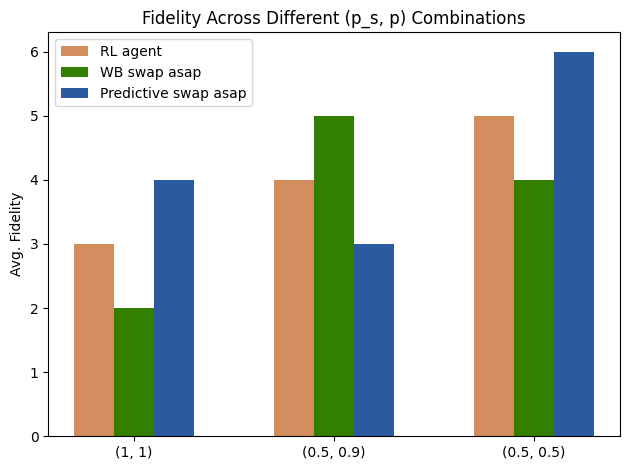

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: each list is the value for one policy across 3 (p_s, p) combinations
RL = [3, 4, 5]
WB = [2, 5, 4]
Predictive = [4, 3, 6]

# x-axis labels showing (p_s, p) for each group
labels = ['(1, 1)', '(0.5, 0.9)', '(0.5, 0.5)']

x = np.arange(len(labels))  # [0, 1, 2]
width = 0.2

fig, ax = plt.subplots()

# Bar plots: each shifted slightly so they don’t overlap
ax.bar(x - width, RL, width, label='RL agent', color='#d38d5fff')
ax.bar(x, WB, width, label='WB swap asap', color='#338000ff')
ax.bar(x + width, Predictive, width, label='Predictive swap asap', color='#2c5aa0ff')

# Label formatting
ax.set_ylabel('Avg. Fidelity')
ax.set_title('Fidelity Across Different (p_s, p) Combinations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()



In [7]:
import numpy as np

a = np.array([10, 20, 30, 40])
b = np.array([2, np.nan, 5, np.nan])

# Create a mask for where b is NOT NaN
mask = ~np.isnan(b)

# Apply the mask to both arrays
a_filtered = a[mask]
b_filtered = b[mask]

# Now safely divide
result = a_filtered / b_filtered

print("Filtered a:", a_filtered)
print("Filtered b:", b_filtered)
print("Result:", result)

Filtered a: [10 30]
Filtered b: [2. 5.]
Result: [5. 6.]


In [14]:
import numpy as np
a = np.ones(8)
a2 = np.array(a)
print(type(a2))
print(a2)
assert np.shape(a) == (8,)

<class 'numpy.ndarray'>
[1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
print([0.8,0.8**2,0.8**3])
print(np.linspace(1, 0.5, 6))
print(np.linspace(0.9, 0.5, 5))

[0.8, 0.6400000000000001, 0.5120000000000001]
[1.  0.9 0.8 0.7 0.6 0.5]
[0.9 0.8 0.7 0.6 0.5]


In [ ]:
import numpy as np
a = [[pe, pe**2, pe**3] for pe in np.linspace(0.9, 0.5, 6)]
b = [[pe, pe**2, pe] for pe in np.linspace(0.9, 0.5, 6)]
print(a)
print(b)
print(a+b)
print(a[1])

[[0.9, 0.81, 0.7290000000000001], [0.8200000000000001, 0.6724000000000001, 0.5513680000000001], [0.74, 0.5476, 0.405224], [0.66, 0.43560000000000004, 0.28749600000000003], [0.5800000000000001, 0.3364000000000001, 0.19511200000000006], [0.5, 0.25, 0.125]]
[[0.9, 0.81, 0.9], [0.8200000000000001, 0.6724000000000001, 0.8200000000000001], [0.74, 0.5476, 0.74], [0.66, 0.43560000000000004, 0.66], [0.5800000000000001, 0.3364000000000001, 0.5800000000000001], [0.5, 0.25, 0.5]]
[[0.9, 0.81, 0.7290000000000001], [0.8200000000000001, 0.6724000000000001, 0.5513680000000001], [0.74, 0.5476, 0.405224], [0.66, 0.43560000000000004, 0.28749600000000003], [0.5800000000000001, 0.3364000000000001, 0.19511200000000006], [0.5, 0.25, 0.125], [0.9, 0.81, 0.9], [0.8200000000000001, 0.6724000000000001, 0.8200000000000001], [0.74, 0.5476, 0.74], [0.66, 0.43560000000000004, 0.66], [0.5800000000000001, 0.3364000000000001, 0.5800000000000001], [0.5, 0.25, 0.5]]
[0.8200000000000001, 0.6724000000000001, 0.551368000000

IndexError: list index out of range

In [14]:
from qnetcc.environments.QNSimulator.QuantumNetwork import Quantum_network 
import random
nodes, t_cut, p, p_s = 8, 10, 0.6, 0.5
fixed_network = Quantum_network(nodes, t_cut, p, p_s)
# setting up a fixed config
for i in range(100): # testing muliple times
    link_arr = [[0,7],[1,2],[4,5]]
    end_age = random.randint(0, t_cut)
    link_age = [end_age,5,3]
    fixed_network.create_network(link_arr, link_age)
    fixed_network.get_link_config()
    fixed_network.get_fidelity()
    assert end_age == fixed_network.get_fidelity()



In [29]:
# none test
import math
print(np.isnan([1, 2, np.nan]).any())
print(np.isnan([1, 2, np.nan]))
np.isnan([1,2,math.nan])
np.isnan([1, 2, None])

True
[False False  True]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [36]:
data = [1, 2, 3]
assert all(isinstance(x, (int, float)) for x in data), "List contains non-numeric values"
data = [1, 2, np.nan]
assert all(isinstance(x, (int, float)) for x in data), "List contains non-numeric values"
assert all(isinstance(x, (int, float)) and not np.isnan(x) for x in data)

AssertionError: 

[0.19999999999999996, 0, 0, 0]


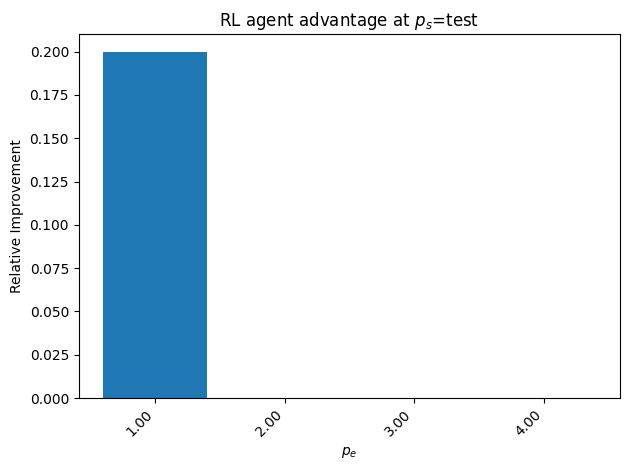

In [46]:
# test relative improvements
import matplotlib.pyplot as plt

def compute_relative_improvement(a, b, c):
    """Return list of relative improvements where a < min(b, c), else 0."""
    rel_improve = []
    for a_i, b_i, c_i in zip(a, b, c):
        ref = min(b_i, c_i)
        if a_i < ref:
            rel_improve.append((ref - a_i) / ref)
        else:
            rel_improve.append(0)
    return rel_improve

a = [0.8, 1.0, 1.2, 8]
b = [1.0, 1.0, 1.5, 2]
c = [1.2, 1.5, 1.1, 3]

print(compute_relative_improvement(a, b, c))

def plot_improvements(rel_improve, p_list, p_s):
    """Plot the bar chart of relative improvements."""
    paired = sorted(zip(p_list, rel_improve), key=lambda pair: pair[0])
    sorted_ps, sorted_rel = zip(*paired)
    labels_str = [f"{ps:.2f}" for ps in sorted_ps]
    indices = range(len(rel_improve))
    plt.figure()
    plt.bar(indices, sorted_rel)
    plt.xticks(indices, labels_str, rotation=45, ha='right')
    plt.ylabel('Relative Improvement')
    plt.xlabel(r'$p_{e}$')
    plt.title('RL agent advantage at ' + r'$p_s$' + f'={p_s}')
    plt.tight_layout()
    plt.show()

p_list = [1, 2, 3, 4]

# Compute and plot
rel_improve = compute_relative_improvement(a, b, c)
plot_improvements(rel_improve, p_list, p_s='test')

In [52]:
rel_improve = compute_relative_improvement(a, b, c)
p_list = [1, 2, 3, 4]
paired = sorted(zip(p_list, rel_improve), key=lambda pair: pair[0])
print(paired)
sorted_ps, sorted_rel = zip(*paired)
print(sorted_ps, sorted_rel)
labels_str = [f"{ps:.2f}" for ps in sorted_ps]
indices = range(len(rel_improve))


# see what key does in zip
p_list = [3, 1, 2]
rel_improve = [0.1, 0.3, 0.2]

list(zip(p_list, rel_improve))
# → [(3, 0.1), (1, 0.3), (2, 0.2)]

sorted(zip(p_list, rel_improve), key=lambda pair: pair[0])
# → [(1, 0.3), (2, 0.2), (3, 0.1)]


[(1, 0.19999999999999996), (2, 0), (3, 0), (4, 0)]
(1, 2, 3, 4) (0.19999999999999996, 0, 0, 0)


[(1, 0.3), (2, 0.2), (3, 0.1)]

In [55]:
p_list   = np.linspace(1, 0.5, 6)  # [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
p_s_list = [1, 0.75, 0.5]

# For each ps in p_s_list, build a sub‐list of (ps, p) for all p in p_list
grouped_tuples = [[(ps, p) for p in p_list] for ps in p_s_list]
for i in range(len(grouped_tuples)):
    print(grouped_tuples[i])


[(1, 1.0), (1, 0.9), (1, 0.8), (1, 0.7), (1, 0.6), (1, 0.5)]
[(0.75, 1.0), (0.75, 0.9), (0.75, 0.8), (0.75, 0.7), (0.75, 0.6), (0.75, 0.5)]
[(0.5, 1.0), (0.5, 0.9), (0.5, 0.8), (0.5, 0.7), (0.5, 0.6), (0.5, 0.5)]


In [56]:
list_of_tuples = [(1, 2), (3, 4), (5, 6)]
"_".join(str(val) for tup in list_of_tuples for val in tup)

'1_2_3_4_5_6'

In [72]:
import numpy as np

print(np.random.randint(20,40))

22


In [76]:
import time 
start_time = time.time()
for i in range(int(1e7)):
    pass
end_time = time.time()
print(f"Execution time: {end_time - start_time:.6f} seconds")

Execution time: 0.144799 seconds


In [79]:
import numpy as np
print(np.average([1, 2, 3, 4, 5]))  # Example usage of numpy average function
print(np.average([1, 2, 3, 3, 5])) 

3.0
2.8
